In [184]:
import numpy as np
import pandas as pd

IMPORT DATA

In [185]:
df = pd.read_csv('/Users/spriha/Downloads/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [186]:
df.shape

(5572, 5)

DATA CLEANING

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [188]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [189]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [190]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [191]:
df['target']=encoder.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [192]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [193]:
df.duplicated().sum()

403

In [194]:
df=df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [195]:
df.duplicated().sum()

0

In [196]:
df.shape

(5169, 2)

EXPLORATORY DATA ANALYSIS

In [197]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

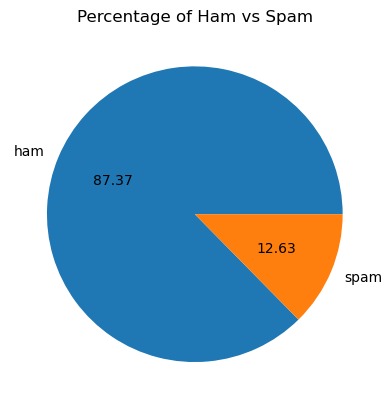

In [198]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.title('Percentage of Ham vs Spam')
plt.show()

In [199]:
import nltk
# Natural Language ToolKit
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/spriha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
df['num_char']=df['text'].apply(len)
df

/var/folders/r_/yz2qlfk95px2g583jkhkr0hh0000gn/T/ipykernel_1649/2642043926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [201]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df

/var/folders/r_/yz2qlfk95px2g583jkhkr0hh0000gn/T/ipykernel_1649/3240112493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [202]:
df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

/var/folders/r_/yz2qlfk95px2g583jkhkr0hh0000gn/T/ipykernel_1649/4195816467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [203]:
df[['num_char', 'num_word', 'num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [204]:
# Ham Messages
df[df['target']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [205]:
# Spam Messages
df[df['target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [206]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

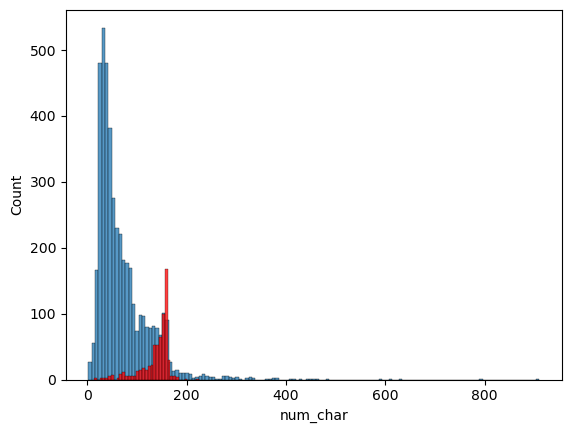

In [207]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

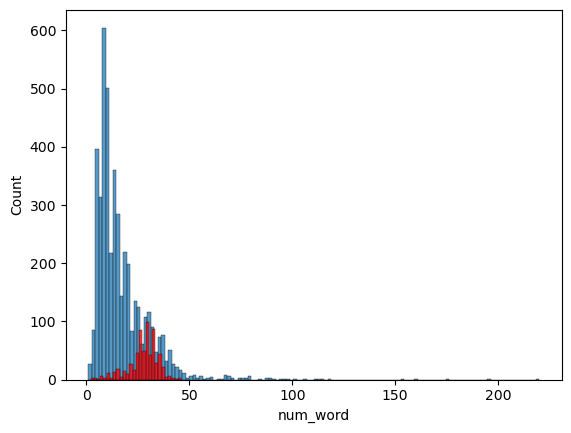

In [208]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

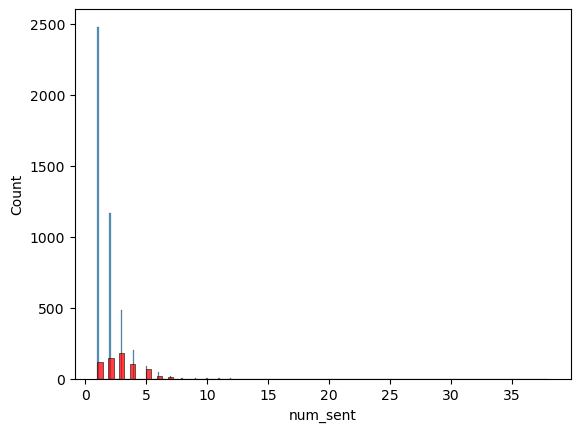

In [209]:
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

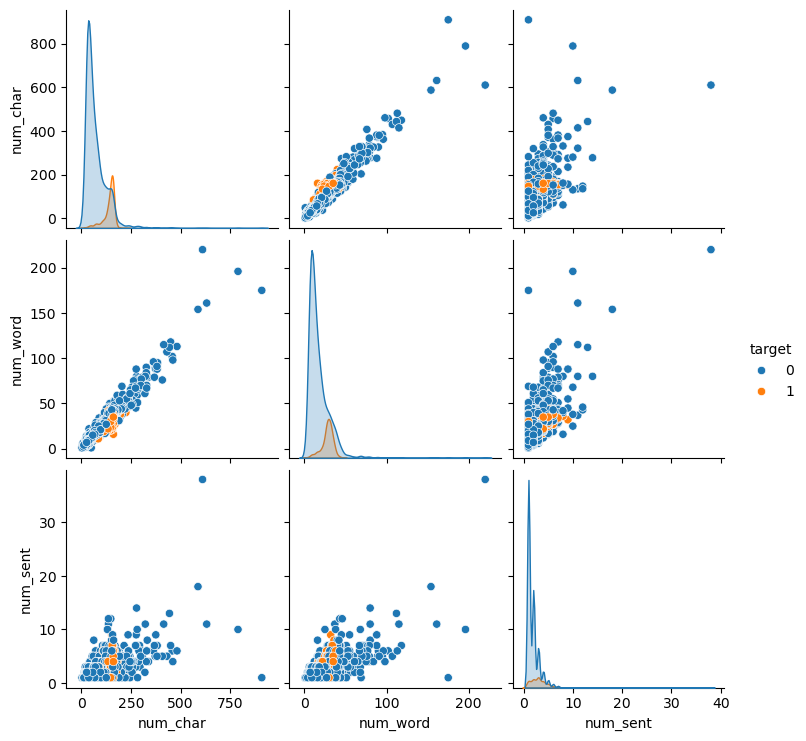

In [210]:
sns.pairplot(df,hue='target')

<Axes: >

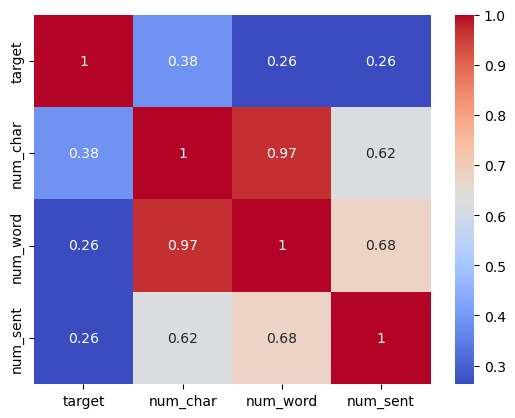

In [211]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

DATA PREPROCESSING

In [212]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

def transform_text(text):
    text = text.lower() # converting to lowercase
    text = nltk.word_tokenize(text) # tokenization

    y=[] 
    for i in text:
        if i.isalnum():
            y.append(i)  # removing special characters

    text = y[:]
    y.clear()

    for i in text: # removing stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    
    text = y[:]
    y.clear()

    for i in text:  # stemming
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spriha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
df['transtext']= df['text'].apply(transform_text)
df

/var/folders/r_/yz2qlfk95px2g583jkhkr0hh0000gn/T/ipykernel_1649/672186223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transtext']= df['text'].apply(transform_text)


,target,text,num_char,num_word,num_sent,transtext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [214]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

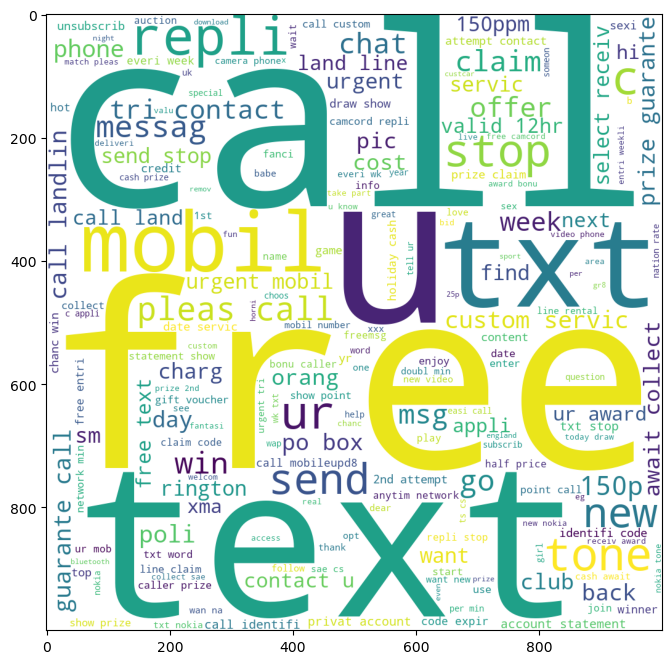

In [215]:
plt.figure(figsize=(12,8))
spam_wc = wc.generate(df[df['target'] == 1]['transtext'].str.cat(sep=" "))
plt.imshow(spam_wc)


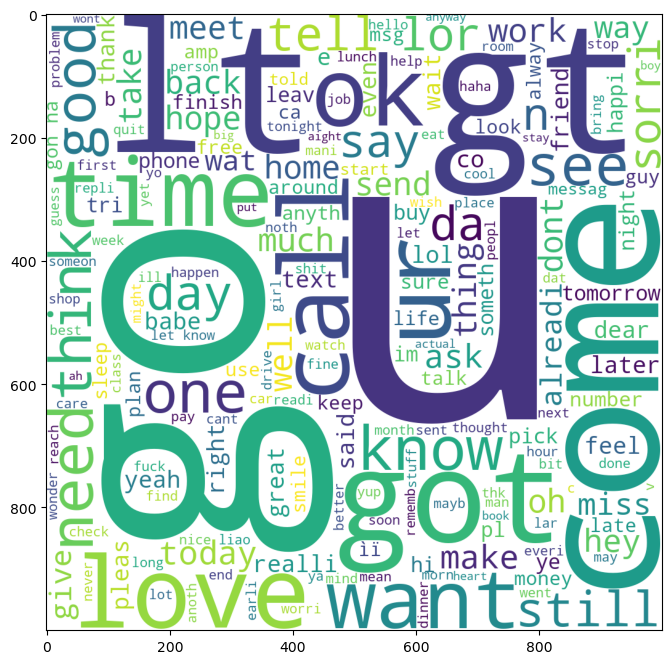

In [216]:
plt.figure(figsize=(12,8))
ham_wc = wc.generate(df[df['target'] == 0]['transtext'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [217]:
spam_corpus=[]

for msg in df[df['target']==1]['transtext'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

/var/folders/r_/yz2qlfk95px2g583jkhkr0hh0000gn/T/ipykernel_1649/4208920466.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_common, palette = 'plasma')


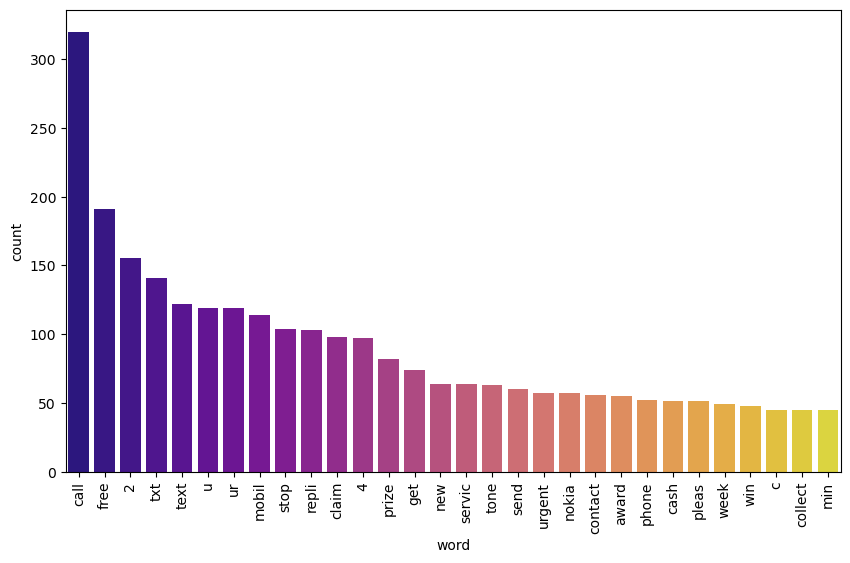

In [218]:
from collections import Counter

# Get top 30 most common words from your spam_corpus
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_common, palette = 'plasma')
plt.xticks(rotation='vertical')
plt.show()


In [219]:
ham_corpus=[]

for msg in df[df['target']==0]['transtext'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

/var/folders/r_/yz2qlfk95px2g583jkhkr0hh0000gn/T/ipykernel_1649/247237474.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_common, palette = 'plasma')


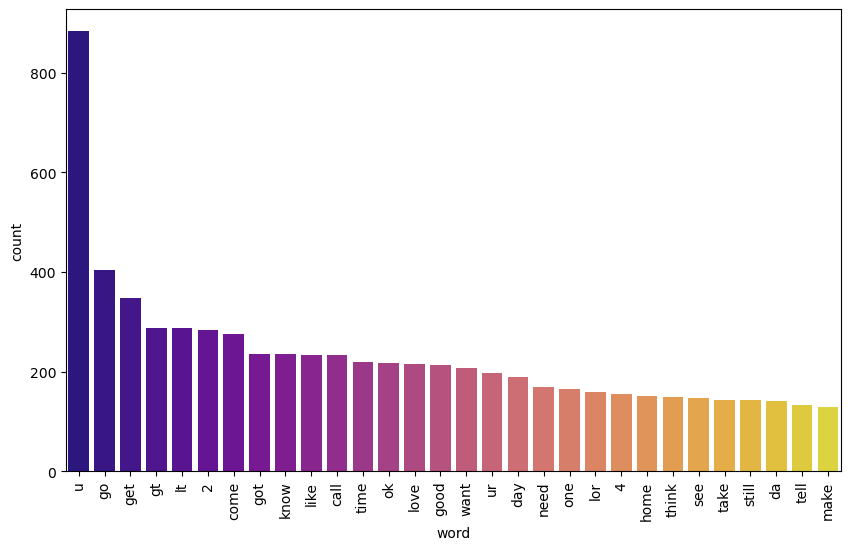

In [220]:
# Get top 30 most common words from your ham_corpus
common_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_common, palette = 'plasma')
plt.xticks(rotation='vertical')
plt.show()

MODEL CONSTRUCTION

In [221]:
# Naive Bayes
# Text Vectorization
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['transtext']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [222]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [225]:

mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [226]:

bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(precision_score(y_test,ypred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [227]:
# TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transtext']).toarray()

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [229]:
gnb.fit(X_train,y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [230]:
mnb.fit(X_train,y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [231]:
bnb.fit(X_train,y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(precision_score(y_test,ypred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [232]:
# TFIDF : MNB

In [233]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [234]:
X=tfidf.fit_transform(df['transtext']).toarray()

In [235]:
X=np.hstack((X,df['num_char'].values.reshape(-1,1)))
X.shape

(5169, 3001)

In [236]:
y=df['target'].values

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [238]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [239]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [243]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Vectorize the data
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transtext'])
y = df['target']

# Train the model
model = MultinomialNB()
model.fit(X, y)

# Save them correctly
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
